In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from pandas.plotting import parallel_coordinates
from IPython.display import display

In [35]:
# Load CSV
df = pd.read_csv(r"C:\Users\tal4t\PycharmProjects\Brainlet\sweep_results_20_input.csv")

# Automatically detect lambda columns and metric columns
lambda_cols = [col for col in df.columns if col.startswith("lambda_")]
accuracy_cols = [col for col in df.columns if "accuracy" in col]
loss_cols = [col for col in df.columns if "loss" in col]
expert_usage_cols = [col for col in df.columns if "expert_" in col and "usage" in col]
gating_cols = [col for col in df.columns if "gating" in col]
ending_epoch = df["epoch_end"]
regression_metrics = [col for col in df.columns if col in ["test_MSE", "test_MAE", "test_R2_t_0", "test_R2_t_end"]]

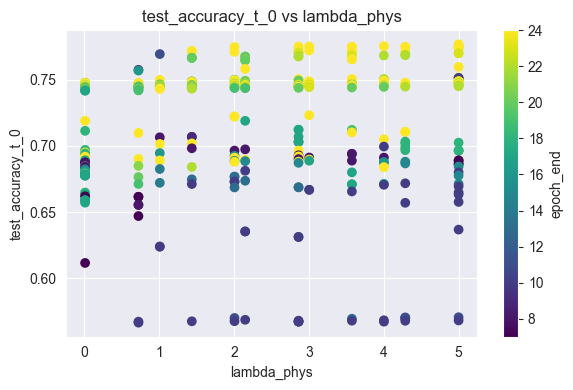

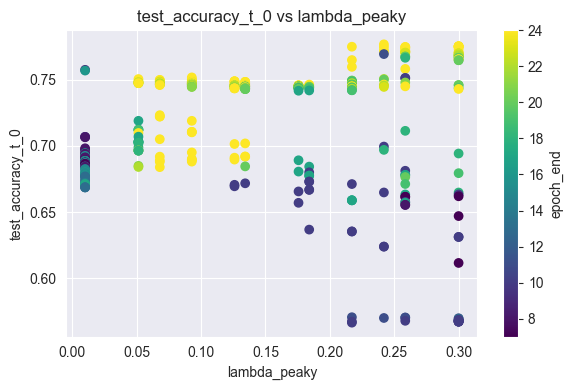

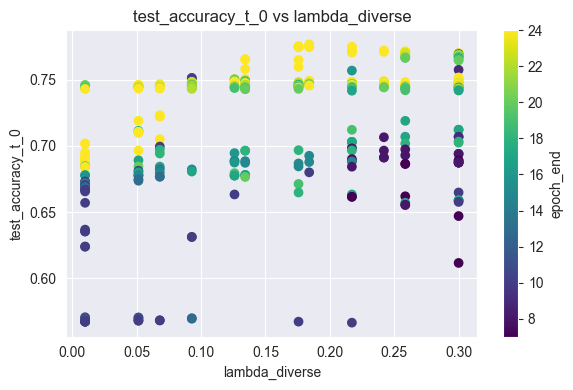

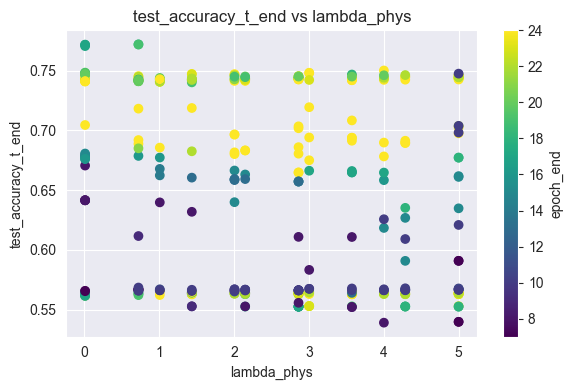

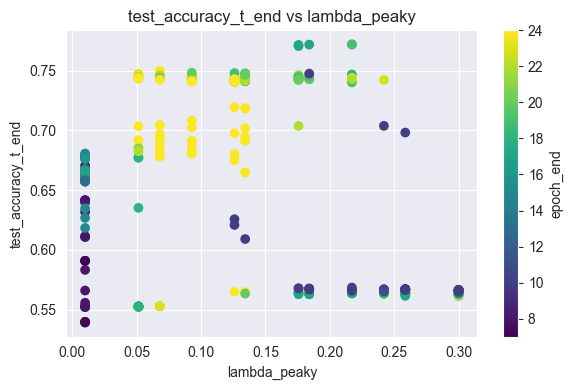

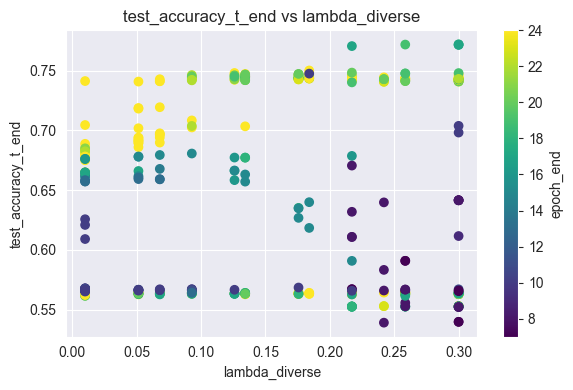

In [48]:
## 1. Accuracy vs Lambda Scatter Plots
def plot_lambda_vs_metric(df, metric="test_accuracy_t_0"):
    for lam in lambda_cols:
        fig, ax = plt.subplots(figsize=(6, 4))
        sc = ax.scatter(
            df[lam], df[metric],
            c=df["epoch_end"],
            cmap="viridis"
        )
        ax.set_title(f"{metric} vs {lam}")
        ax.set_xlabel(lam)
        ax.set_ylabel(metric)

        # Add colorbar
        cbar = plt.colorbar(sc, ax=ax)
        cbar.set_label("epoch_end")

        plt.tight_layout()
        plt.show()


plot_lambda_vs_metric(df, "test_accuracy_t_0")
plot_lambda_vs_metric(df, "test_accuracy_t_end")


In [52]:
## 2. 3D Scatter of Lambdas vs Accuracy

fig = px.scatter_3d(df, x=lambda_cols[0], y=lambda_cols[1], z=lambda_cols[2],
                    color="test_accuracy_t_0", hover_data=["run_id"])
fig.update_layout(title="3D Lambda Space Colored by test_accuracy_t_0")
fig.show()

fig = px.scatter_3d(df, x=lambda_cols[0], y=lambda_cols[1], z=lambda_cols[2],
                    color="test_accuracy_t_end", hover_data=["run_id"])
fig.update_layout(title="3D Lambda Space Colored by test_accuracy_t_0")
fig.show()

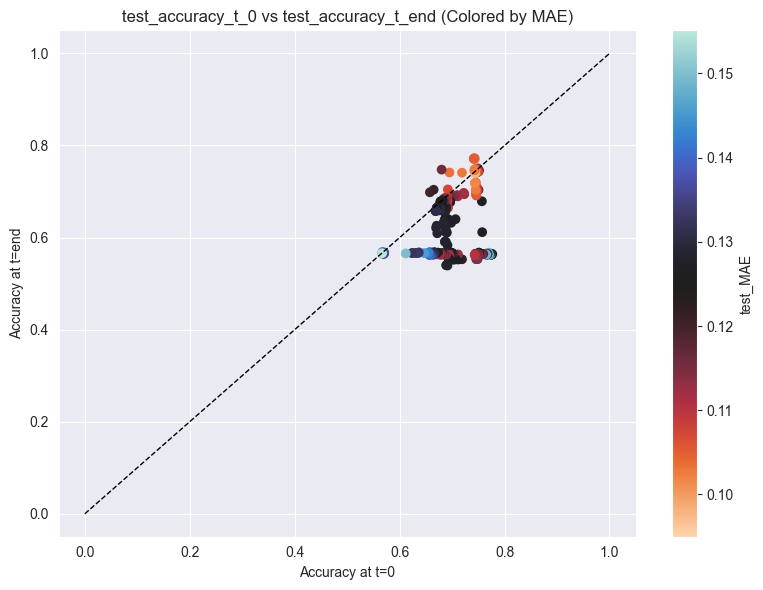

In [54]:
## 3. Accuracy vs Generalization (Overfitting Insight)
fig, ax = plt.subplots(figsize=(8,6))
sc = ax.scatter(
    df["test_accuracy_t_0"],
    df["test_accuracy_t_end"],
    c=df["test_MAE"],
    cmap="icefire_r"
)
ax.plot([0, 1], [0, 1], 'k--', lw=1)
ax.set_title("test_accuracy_t_0 vs test_accuracy_t_end (Colored by MAE)")
ax.set_xlabel("Accuracy at t=0")
ax.set_ylabel("Accuracy at t=end")

# Add colorbar
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label("test_MAE")

plt.tight_layout()
plt.show()


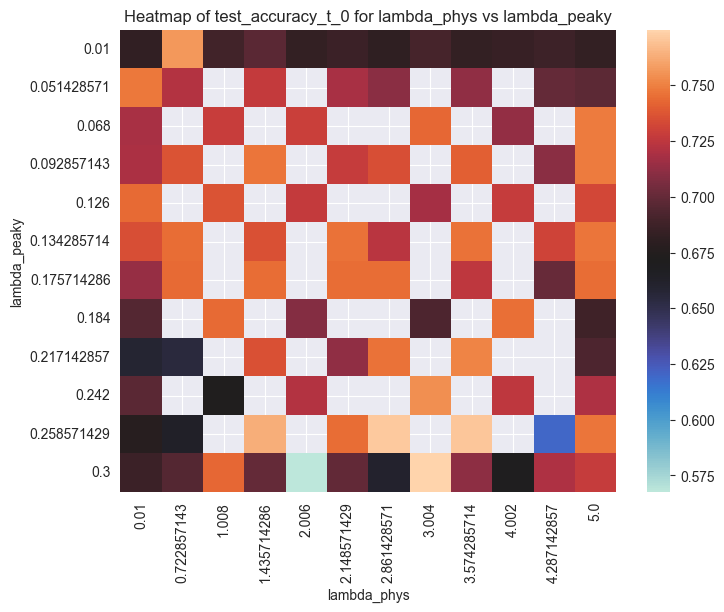

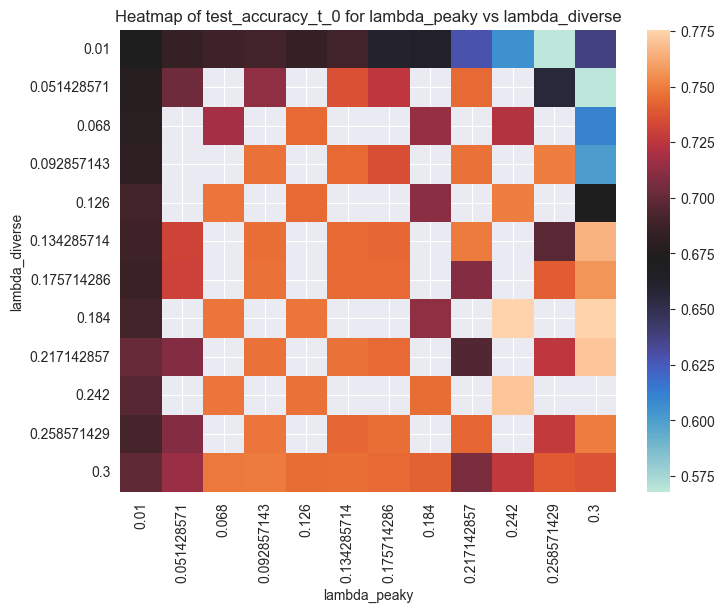

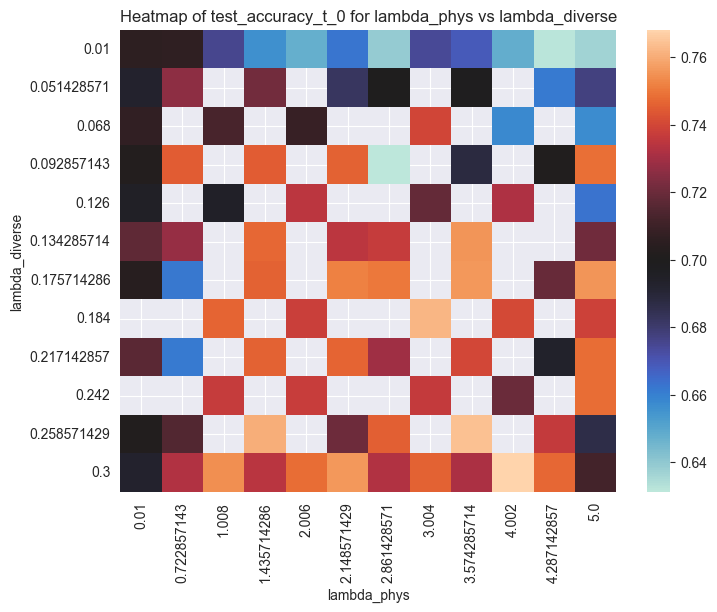

In [26]:
## 4. Heatmap of Accuracy for Pairs of Lambdas
def heatmap_for_lambdas(df, lambda_x, lambda_y, metric="test_accuracy_t_0"):
    pivot = df.pivot_table(values=metric, index=lambda_y, columns=lambda_x, aggfunc="mean")
    plt.figure(figsize=(8,6))
    sns.heatmap(pivot, annot=False, cmap="icefire")
    plt.title(f"Heatmap of {metric} for {lambda_x} vs {lambda_y}")
    plt.xlabel(lambda_x)
    plt.ylabel(lambda_y)
    plt.show()

heatmap_for_lambdas(df, lambda_cols[0], lambda_cols[1], "test_accuracy_t_0") #epoch_end
heatmap_for_lambdas(df, lambda_cols[1], lambda_cols[2], "test_accuracy_t_0")
heatmap_for_lambdas(df, lambda_cols[0], lambda_cols[2], "test_accuracy_t_0")



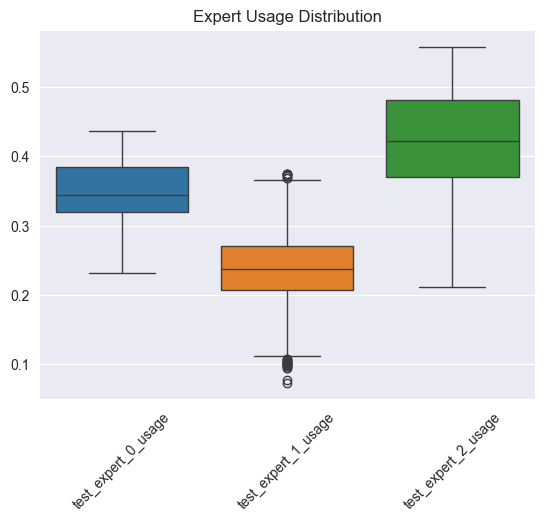

In [27]:
## 5. Expert Usage Distribution
sns.boxplot(data=df[expert_usage_cols])
plt.title("Expert Usage Distribution")
plt.xticks(rotation=45)
plt.show()


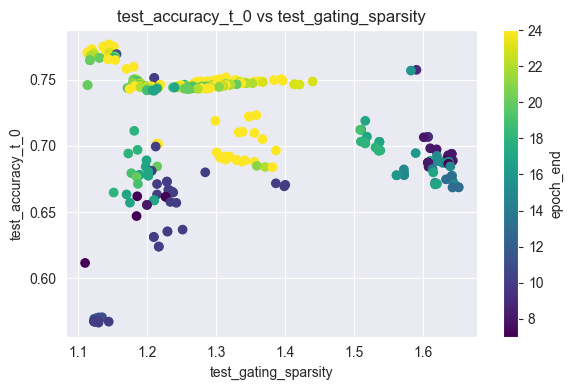

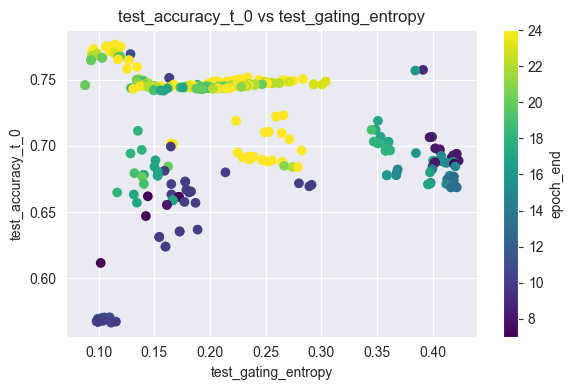

In [50]:
## 6. Gating Behavior vs Accuracy
for gate_col in gating_cols:
    fig, ax = plt.subplots(figsize=(6, 4))
    sc = ax.scatter(
        df[gate_col],
        df["test_accuracy_t_0"],
        c=df["epoch_end"],
        cmap="viridis"
    )
    ax.set_title(f"test_accuracy_t_0 vs {gate_col}")
    ax.set_xlabel(gate_col)
    ax.set_ylabel("test_accuracy_t_0")

    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label("epoch_end")

    plt.tight_layout()
    plt.show()


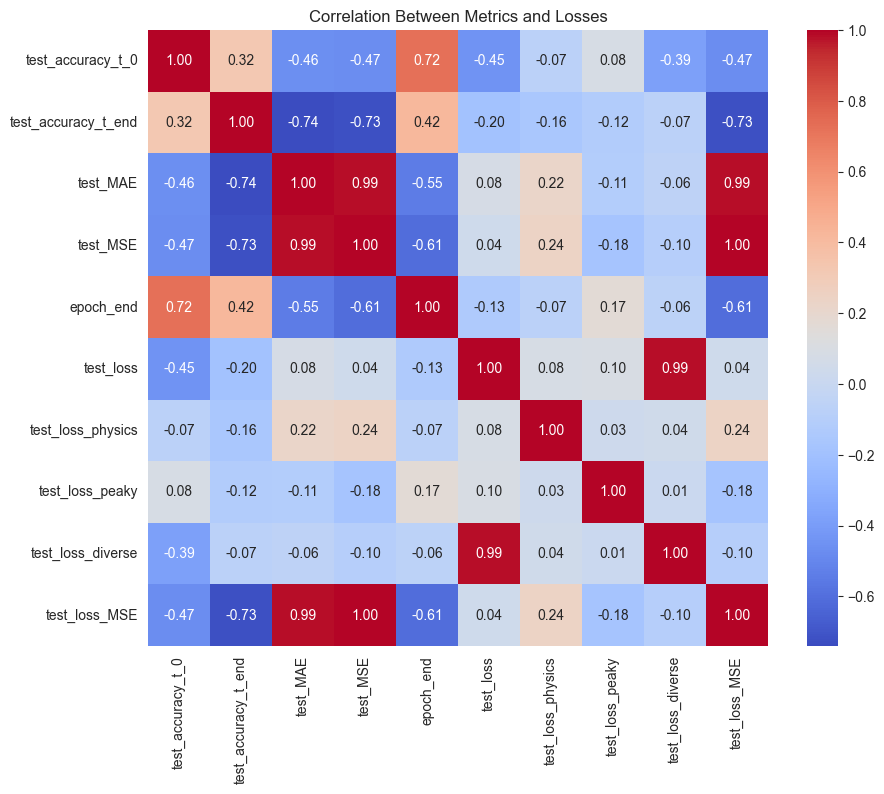

In [39]:
## 7. Correlation Heatmap
metrics_cols = ["test_accuracy_t_0", "test_accuracy_t_end", "test_MAE", "test_MSE", "epoch_end"] + loss_cols
corr = df[metrics_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Metrics and Losses")
plt.show()


In [40]:
## 8. Best Run Recommendation
# Score: accuracy_t_0 + accuracy_t_end - MAE - MSE
df["score"] = df["test_accuracy_t_0"] + df["test_accuracy_t_end"] - df["test_MAE"] - df["test_MSE"]
top_runs = df.sort_values("score", ascending=False).head(10)

display(top_runs[["run_id", "score", "test_accuracy_t_0", "test_accuracy_t_end", "test_MAE", "test_MSE", "epoch_end"] + lambda_cols])


,run_id,score,test_accuracy_t_0,test_accuracy_t_end,test_MAE,test_MSE,epoch_end,lambda_phys,lambda_peaky,lambda_diverse
214,04dg1f6k,1.321076,0.741966,0.772099,0.104255,0.088733,18,0.722857,0.217143,0.300000
215,jjn3djaq,1.321020,0.741899,0.771898,0.104128,0.088648,19,0.722857,0.217143,0.258571
202,gob65s4u,1.319702,0.743335,0.771598,0.104214,0.091016,17,0.010000,0.175714,0.300000
216,ncga8r13,1.319231,0.741765,0.771865,0.105037,0.089363,17,0.010000,0.184000,0.300000
217,420g7bl7,1.318061,0.741565,0.770629,0.105096,0.089037,17,0.010000,0.175714,0.217143
208,k0lx3rsw,1.310960,0.743068,0.742333,0.095075,0.079366,20,0.722857,0.175714,0.134286
188,fht6lxbm,1.310777,0.744037,0.740262,0.094984,0.078538,19,1.435714,0.217143,0.217143
116,tkg4dthr,1.309765,0.746141,0.746843,0.099348,0.083871,18,3.574286,0.217143,0.175714
162,pbx6glcj,1.309413,0.744738,0.742734,0.096900,0.081160,24,2.148571,0.175714,0.175714
196,1u30u2bf,1.307013,0.743569,0.745006,0.098614,0.082948,19,2.006000,0.184000,0.126000
